<h1>Using stat_graph.regviz</h1>
<h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Energy Data From UCI Machine Learning Repository
loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
df = pd.read_csv(loc,parse_dates=['date'])


In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Load data into feature and target data, dropping target and date features
y = df['Appliances']+df['lights']
x = df.drop(['Appliances','lights','date'],axis=1)

In [5]:
# Load stats models, add a the constant, intitialize the OLS, and fit the model
import statsmodels.api as sm 
x = sm.add_constant(x)
model_0 = sm.OLS(y,x)
res = model_0.fit()

In [6]:
#Show statistical summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     143.6
Date:                Wed, 29 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:03:21   Log-Likelihood:            -1.1808e+05
No. Observations:               19735   AIC:                         2.362e+05
Df Residuals:                   19709   BIC:                         2.364e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.9492     96.920      0.288      0.773    -162.023     217.921
T1              0.8895      1.888      0.471      0.638      -2.811       4.590
RH_1           16.5302      0.685     24.130      0.000      15.187      17.873
T2            -21.6137      1.669    -12.952      0.000     -24.884     -18.343
RH_2          -14.8827      0.785    -18.962      0.000     -16.421     -13.344
T3             25.3590      1.078     23.526      0.000      23.246      27.472
RH_3            5.1113      0.691      7.395      0.000       3.757       6.466
T4              6.2207      1.001      6.215      0.000       4.259       8.183
RH_4            3.0186      0.643      4.691      0.000       1.757       4.280
T5             -0.0161      1.202     -0.013      0.989      -2.372       2.340
RH_5            0.2870      0.089      3.230      0.001       0.113       0.461
T6              7.9276      0.649     12.215      0.000       6.655       9.200
RH_6            0.3771      0.069      5.438      0.000       0.241       0.513
T7              0.7937      1.355      0.586      0.558      -1.863       3.450
RH_7           -1.9887      0.440     -4.523      0.000      -2.851      -1.127
T8             11.1588      0.987     11.305      0.000       9.224      13.094
RH_8           -6.5252      0.377    -17.308      0.000      -7.264      -5.786
T9            -25.2152      1.779    -14.174      0.000     -28.702     -21.728
RH_9           -1.8083      0.419     -4.320      0.000      -2.629      -0.988
T_out         -10.8475      1.558     -6.961      0.000     -13.902      -7.793
Press_mm_hg     0.1149      0.110      1.048      0.295      -0.100       0.330
RH_out         -0.8334      0.322     -2.589      0.010      -1.464      -0.202
Windspeed       2.3427      0.353      6.634      0.000       1.651       3.035
Visibility      0.1869      0.059      3.160      0.002       0.071       0.303
Tdewpoint       5.0901      1.513      3.364      0.001       2.125       8.056
rv1            -0.0203      0.024     -0.862      0.389      -0.067       0.026
rv2            -0.0203      0.024     -0.862      0.389      -0.067       0.026
==============================================================================
Omnibus:                    13812.776   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202610.519
Skew:                           3.282   Prob(JB):                         0.00
Kurtosis:                      17.258   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-22. This might indicate that there are
strong multicollinearity probl

<h3>The output from statsmodels summary, while very detailed, is quite cryptic to business leaders who are not well versed in linear regression.
<BR></BR><BR></BR>
Next, I'll import regviz and walk through how we might be able to share the results in a more intiutive fashion</h3>

In [7]:
#import the regviz class, intitialize with the stats models fit model, and show the fitted feature data
from stat_graph import regviz
viz = regviz(sm_results=res)
viz.get_feature_data()

,l_ci_95,h_ci_95,coefs,l_ci_99,h_ci_99,pval
const,-162.022507,217.920970,27.949232,-221.724801,277.623264,7.730637e-01
T1,-2.810731,4.589726,0.889497,-3.973600,5.752594,6.375144e-01
RH_1,15.187424,17.872937,16.530180,14.765437,18.294924,8.361804e-127
T2,-24.884491,-18.342845,-21.613668,-25.912411,-17.314926,3.266579e-38
RH_2,-16.421126,-13.344259,-14.882692,-16.904608,-12.860776,1.802380e-79
T3,23.246124,27.471809,25.358966,22.582122,28.135810,1.027882e-120
RH_3,3.756567,6.466038,5.111303,3.330816,6.891789,1.468080e-13
T4,4.258950,8.182527,6.220739,3.642420,8.799058,5.224367e-10
RH_4,1.757279,4.279887,3.018583,1.360890,4.676276,2.738028e-06
T5,-2.372238,2.339996,-0.016121,-3.112693,3.080452,9.892999e-01


<h3>
Using regviz.get_feature_data(), we can see a fitted dataframe of information from the statsmodels fitted regression. This will be used as the backbone of the visualization.
<BR><BR></BR></BR>
It's easy to plot from here - just use regviz.plot()
</h3>

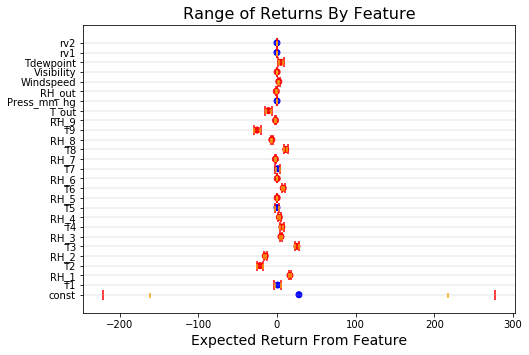

In [8]:
#Show initial plot
viz.plot()

<h3>
We can see the features from the regression in rows while the expected return is on the x axis. The dot represents the coefficient while the width of the larger | markers represent 99% confidence of the coefficient, and the width of the smallerer | markers represent 95% confidence of the coefficient. The color of the dot represents the P Value. They are: <br></BR>
<ul>
    <li>Blue > .05</li>
    <li>Orange <= .05 and > .01 </li>
    <li>Red <= .01</li>
</ul>
<BR></br>
There is one feature, the constant, that has a lot of uncertainty. Plus the P - Value is high. Let's hide that to see how the rest of the features look.
</h3>

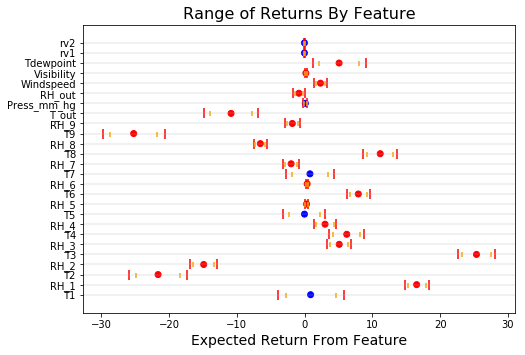

In [9]:
#Plot with a hidden feature
viz.plot(hide_features=['const'])

<h3>
The data seems randomly plotted. We can use regviz.sort_features() to sort the data frame.
</h3>

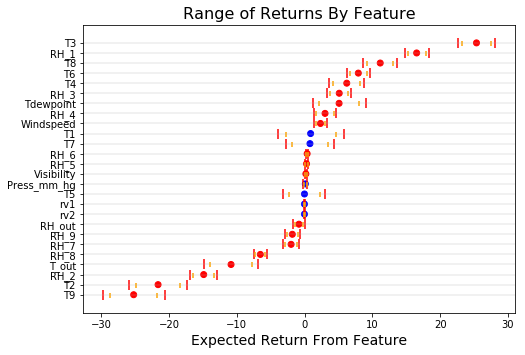

In [10]:
#Sort the features and plot
viz.sort_features(sort_by='coefs')
viz.plot(hide_features=['const'])

<h3>
Working with data, we may use cryptic names for the features during our programming. We can clean this up by passing a dict with keys being the original feature names and values being the new feature names.
</h3>

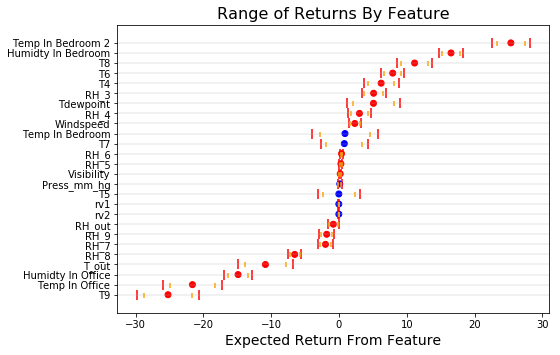

In [11]:
#Update the name of some feature items and plot
ftr_names =  {
        'T2':'Temp In Office',
        'RH_2':'Humidty In Office',
        'T1':'Temp In Bedroom',
        'T3':'Temp In Bedroom 2',
        'RH_1':'Humidty In Bedroom',
        'const':'Y-Intercept',
        }

viz.set_feature_names(ftr_names)
viz.plot(hide_features=['Y-Intercept'])

<h3>
We're able to change the scale of features as well. For example, if it takes 10,000 web visits per sale and only 10 store visits per sale, we could apply a mulriplier to either web visits or store visits to bring them on the same visual scale.<BR></BR><BR></BR>
Let's see what this looks like on the Const or what we renamed to Y-Intercept
</h3>

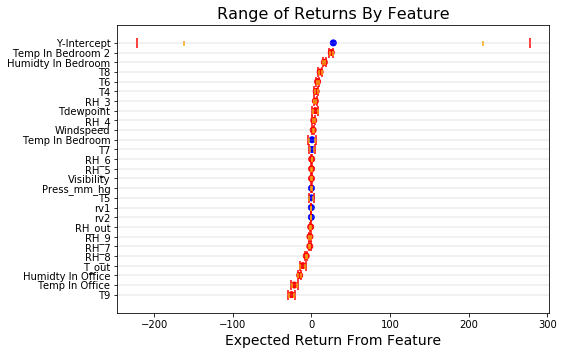

In [12]:
viz.plot()

<h3>Bring the scale down to that of the other features</h3>

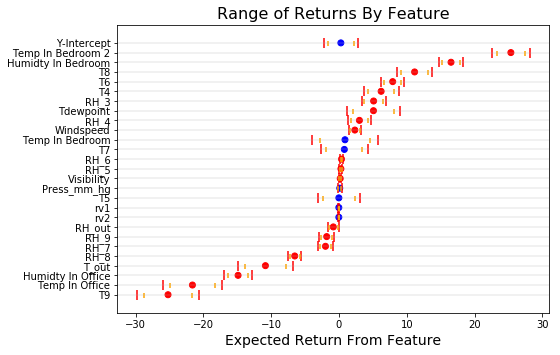

In [13]:
viz.set_multipliers({'Y-Intercept':.01})
viz.plot()

<h3>Resort to see where it stands vs the other features</h3>

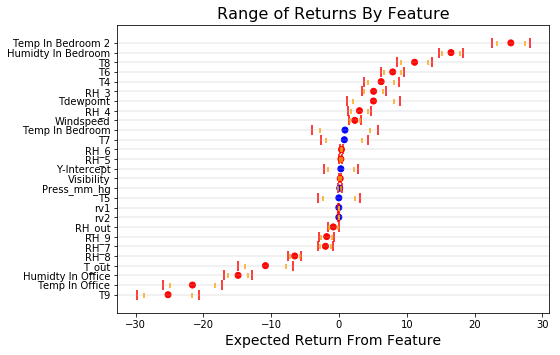

In [14]:
viz.sort_features()
viz.plot()

<h3>Finally, we can undo the multipliers.<br></br><br></br>In addition, if you need to update the multiplier of a feature, if you set the feature again, regviz will undo the original and reapply the new multiplier. </h3>

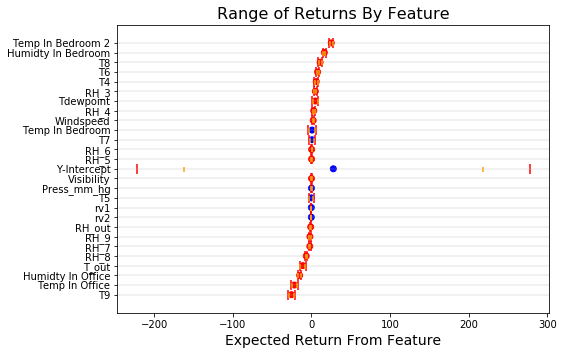

In [15]:
viz.undo_multipliers()
viz.plot()

<h3>Finally, if you'd like to drop this into your own matplotlib axes, you can pass one as an argument to regviz.plot().</h3>

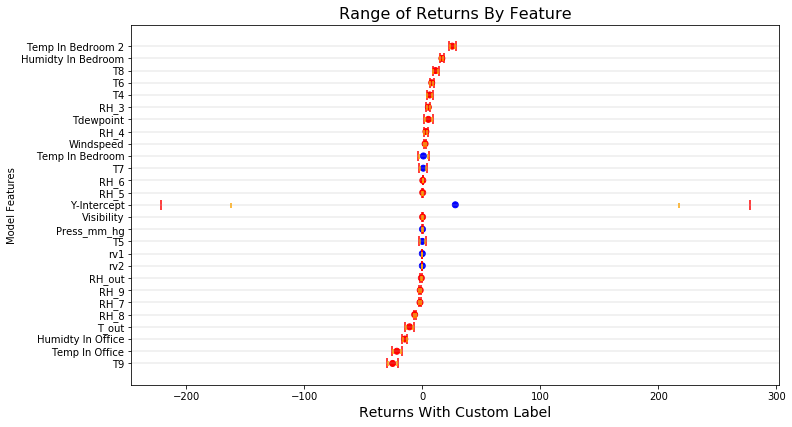

In [16]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0,0,1,1])
viz.plot(ax=ax)
ax.set_xlabel('Returns With Custom Label');
ax.set_ylabel('Model Features');